# Walmart Sales Prediction - Model Training and Evaluation

This notebook performs data preprocessing, feature engineering, model training, and evaluation.

## Table of Contents
1. [Setup and Data Loading](#setup)
2. [Data Preprocessing](#preprocessing)
3. [Feature Engineering](#features)
4. [Data Splitting](#splitting)
5. [Model Training](#training)
6. [Model Evaluation](#evaluation)
7. [Feature Importance Analysis](#importance)
8. [Model Comparison](#comparison)
9. [Save Best Model](#save)

## 1. Setup and Data Loading <a id='setup'></a>

In [1]:
# Import libraries
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from data_preprocessing import WalmartDataPreprocessor
from model_training import WalmartModelTrainer
from model_evaluation import WalmartModelEvaluator

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries and modules imported successfully!")

✓ All libraries and modules imported successfully!


## 2. Data Preprocessing <a id='preprocessing'></a>

In [2]:
# Initialize preprocessor
preprocessor = WalmartDataPreprocessor('../Walmart.csv')

# Load data
df = preprocessor.load_data()

# Explore data
preprocessor.explore_data()

Data loaded successfully! Shape: (6435, 8)

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None

=== First Few Rows ===
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514  

## 3. Feature Engineering <a id='features'></a>

In [3]:
# Parse dates and extract features
df = preprocessor.parse_dates()
print("\nNew features created:")
print(df[['Date', 'Year', 'Month', 'Week', 'Quarter', 'Month_Sin', 'Month_Cos']].head())

Date features extracted successfully!

New features created:
        Date  Year  Month  Week  Quarter  Month_Sin     Month_Cos
0 2010-02-05  2010      2     5        1   0.866025  5.000000e-01
1 2010-02-12  2010      2     6        1   0.866025  5.000000e-01
2 2010-02-19  2010      2     7        1   0.866025  5.000000e-01
3 2010-02-26  2010      2     8        1   0.866025  5.000000e-01
4 2010-03-05  2010      3     9        1   1.000000  6.123234e-17


In [4]:
# Create lag features (previous weeks' sales)
df = preprocessor.create_lag_features(lags=[1, 2, 4])
print("\nLag features:")
print(df[['Store', 'Date', 'Weekly_Sales', 'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_4']].head(10))

Lag features created for lags: [1, 2, 4]

Lag features:
   Store       Date  Weekly_Sales  Sales_Lag_1  Sales_Lag_2  Sales_Lag_4
0      1 2010-02-05    1643690.90          NaN          NaN          NaN
1      1 2010-02-12    1641957.44   1643690.90          NaN          NaN
2      1 2010-02-19    1611968.17   1641957.44   1643690.90          NaN
3      1 2010-02-26    1409727.59   1611968.17   1641957.44          NaN
4      1 2010-03-05    1554806.68   1409727.59   1611968.17   1643690.90
5      1 2010-03-12    1439541.59   1554806.68   1409727.59   1641957.44
6      1 2010-03-19    1472515.79   1439541.59   1554806.68   1611968.17
7      1 2010-03-26    1404429.92   1472515.79   1439541.59   1409727.59
8      1 2010-04-02    1594968.28   1404429.92   1472515.79   1554806.68
9      1 2010-04-09    1545418.53   1594968.28   1404429.92   1439541.59


In [5]:
# Create rolling statistics features
df = preprocessor.create_rolling_features(windows=[4, 8])
print("\nRolling features:")
rolling_cols = [col for col in df.columns if 'Rolling' in col]
print(df[['Store', 'Date', 'Weekly_Sales'] + rolling_cols].head(10))

Rolling features created for windows: [4, 8]

Rolling features:
   Store       Date  Weekly_Sales  Sales_RollingMean_4  Sales_RollingStd_4  \
0      1 2010-02-05    1643690.90         1.643691e+06                 NaN   
1      1 2010-02-12    1641957.44         1.642824e+06         1225.741321   
2      1 2010-02-19    1611968.17         1.632539e+06        17835.791719   
3      1 2010-02-26    1409727.59         1.576836e+06       112353.415114   
4      1 2010-03-05    1554806.68         1.554615e+06       103135.002548   
5      1 2010-03-12    1439541.59         1.504011e+06        95360.050839   
6      1 2010-03-19    1472515.79         1.469148e+06        62599.457150   
7      1 2010-03-26    1404429.92         1.467823e+06        64308.381016   
8      1 2010-04-02    1594968.28         1.477864e+06        82871.762296   
9      1 2010-04-09    1545418.53         1.504333e+06        83458.043354   

   Sales_RollingMean_8  Sales_RollingStd_8  
0         1.643691e+06          

In [6]:
# Handle missing values
df = preprocessor.handle_missing_values()

# Check the result
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before: 405, after: 0

Missing values after handling:
Store                  0
Date                   0
Weekly_Sales           0
Holiday_Flag           0
Temperature            0
Fuel_Price             0
CPI                    0
Unemployment           0
Year                   0
Month                  0
Week                   0
Day                    0
DayOfWeek              0
Quarter                0
Month_Sin              0
Month_Cos              0
Sales_Lag_1            0
Sales_Lag_2            0
Sales_Lag_4            0
Sales_RollingMean_4    0
Sales_RollingStd_4     0
Sales_RollingMean_8    0
Sales_RollingStd_8     0
dtype: int64


In [7]:
# Prepare final feature set (drop Date column)
df_features = preprocessor.prepare_features(drop_date=True)
print("\nFinal dataset shape:", df_features.shape)
print("\nFeature columns:")
print(df_features.columns.tolist())

Final feature set shape: (6435, 22)
Features: ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Day', 'DayOfWeek', 'Quarter', 'Month_Sin', 'Month_Cos', 'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_4', 'Sales_RollingMean_4', 'Sales_RollingStd_4', 'Sales_RollingMean_8', 'Sales_RollingStd_8']

Final dataset shape: (6435, 22)

Feature columns:
['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Day', 'DayOfWeek', 'Quarter', 'Month_Sin', 'Month_Cos', 'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_4', 'Sales_RollingMean_4', 'Sales_RollingStd_4', 'Sales_RollingMean_8', 'Sales_RollingStd_8']


## 4. Data Splitting <a id='splitting'></a>

In [8]:
# Split data into train and test sets
preprocessor.df = df_features
X_train, X_test, y_train, y_test = preprocessor.split_data(test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

Training set size: 5148
Testing set size: 1287
Training set: 5148 samples
Test set: 1287 samples
Features: 21


In [9]:
# Scale features
X_train_scaled, X_test_scaled = preprocessor.scale_features(
    X_train, X_test, 
    exclude_cols=['Store', 'Holiday_Flag', 'Year']
)

print("Features scaled successfully!")
print(f"\nTraining set (scaled): {X_train_scaled.shape}")
print(f"Test set (scaled): {X_test_scaled.shape}")

Scaled 18 features
Features scaled successfully!

Training set (scaled): (5148, 21)
Test set (scaled): (1287, 21)


## 5. Model Training <a id='training'></a>

In [10]:
# Initialize model trainer
trainer = WalmartModelTrainer(models_dir='../models')

# Initialize all models
models = trainer.initialize_models()

Initialized 5 models:
  - Linear Regression
  - Decision Tree
  - Random Forest
  - Gradient Boosting
  - XGBoost


In [11]:
# Train all models
trained_models = trainer.train_all_models(X_train_scaled, y_train)

Training all models...

Training Linear Regression...
Linear Regression trained successfully in 0.01 seconds!

Training Decision Tree...
Decision Tree trained successfully in 0.22 seconds!

Training Random Forest...
Random Forest trained successfully in 3.36 seconds!

Training Gradient Boosting...
Gradient Boosting trained successfully in 14.04 seconds!

Training XGBoost...
XGBoost trained successfully in 1.73 seconds!

All 5 models trained successfully!


## 6. Model Evaluation <a id='evaluation'></a>

In [12]:
# Initialize evaluator
evaluator = WalmartModelEvaluator()

# Evaluate all models
evaluator.evaluate_all_models(trained_models, X_train_scaled, y_train, X_test_scaled, y_test)


EVALUATING ALL MODELS

Linear Regression Performance

Training Set:
  R² Score: 0.9691
  MAE: 58,693.5115
  MSE: 9,804,680,992.1689
  RMSE: 99,018.5891
  MAPE (%): 5.7544

Test Set:
  R² Score: 0.9711
  MAE: 59,065.7028
  MSE: 9,325,582,294.9422
  RMSE: 96,569.0545
  MAPE (%): 5.8792

Decision Tree Performance

Training Set:
  R² Score: 0.9862
  MAE: 39,332.8484
  MSE: 4,381,498,779.7180
  RMSE: 66,192.8907
  MAPE (%): 3.7243

Test Set:
  R² Score: 0.9747
  MAE: 55,251.6751
  MSE: 8,143,594,647.9149
  RMSE: 90,241.8675
  MAPE (%): 5.2764

Random Forest Performance

Training Set:
  R² Score: 0.9926
  MAE: 26,259.8105
  MSE: 2,334,497,546.6235
  RMSE: 48,316.6384
  MAPE (%): 2.4987

Test Set:
  R² Score: 0.9810
  MAE: 44,386.0209
  MSE: 6,128,789,904.5111
  RMSE: 78,286.5883
  MAPE (%): 4.1989

Gradient Boosting Performance

Training Set:
  R² Score: 0.9967
  MAE: 23,093.6607
  MSE: 1,053,870,870.3650
  RMSE: 32,463.3774
  MAPE (%): 2.4575

Test Set:
  R² Score: 0.9915
  MAE: 33,126.183

In [13]:
# Get results as DataFrame
results_df = evaluator.get_results_dataframe()
print("\nModel Performance Summary:")
results_df


Model Performance Summary:


,R² Score,MAE,MSE,RMSE,MAPE (%)
Linear Regression (Train),0.9691,58693.5115,9.804681e+09,99018.5891,5.7544
Linear Regression (Test),0.9711,59065.7028,9.325582e+09,96569.0545,5.8792
Decision Tree (Train),0.9862,39332.8484,4.381499e+09,66192.8907,3.7243
Decision Tree (Test),0.9747,55251.6751,8.143595e+09,90241.8675,5.2764
Random Forest (Train),0.9926,26259.8105,2.334498e+09,48316.6384,2.4987
Random Forest (Test),0.9810,44386.0209,6.128790e+09,78286.5883,4.1989
Gradient Boosting (Train),0.9967,23093.6607,1.053871e+09,32463.3774,2.4575
Gradient Boosting (Test),0.9915,33126.1830,2.731149e+09,52260.3916,3.3408
XGBoost (Train),0.9957,26515.6663,1.350123e+09,36744.0153,2.8618
XGBoost (Test),0.9905,35365.3565,3.059247e+09,55310.4579,3.6957


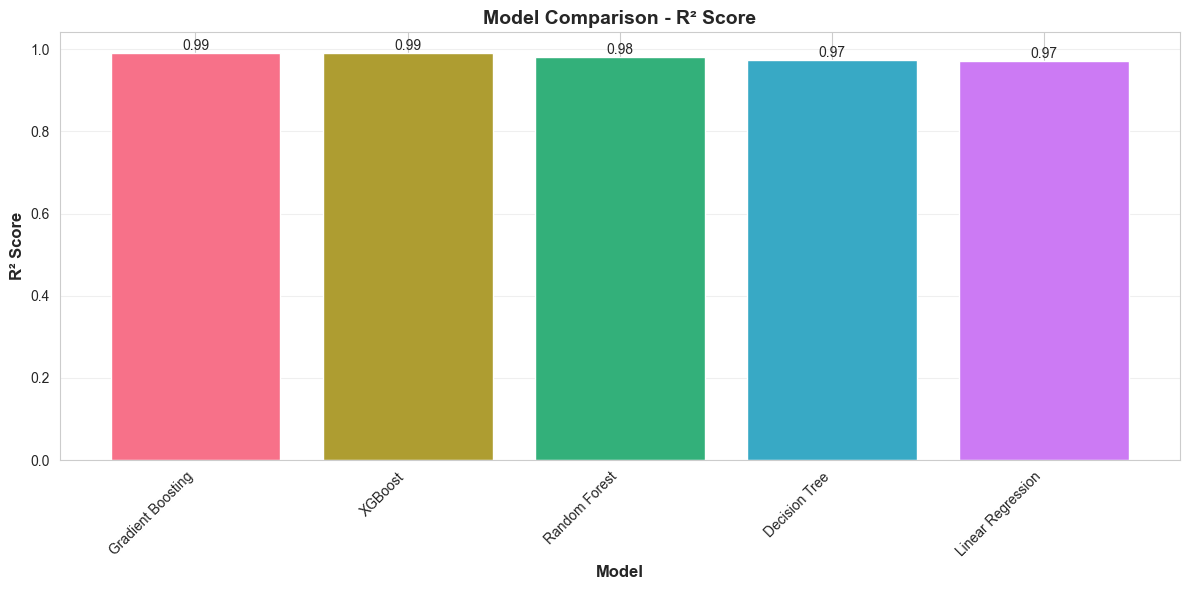

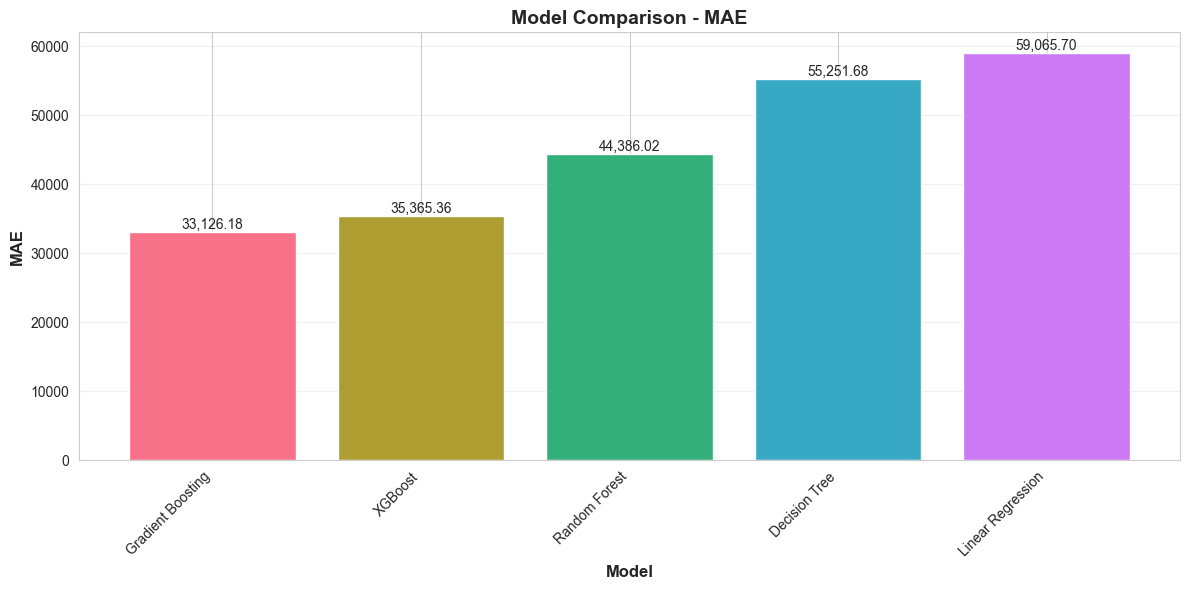

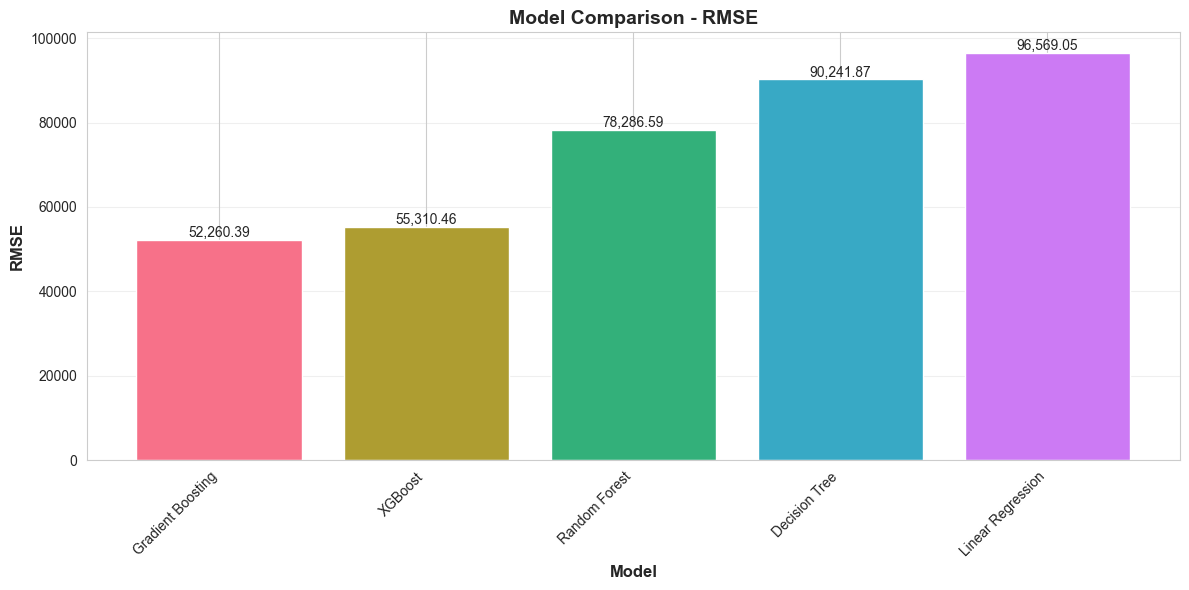

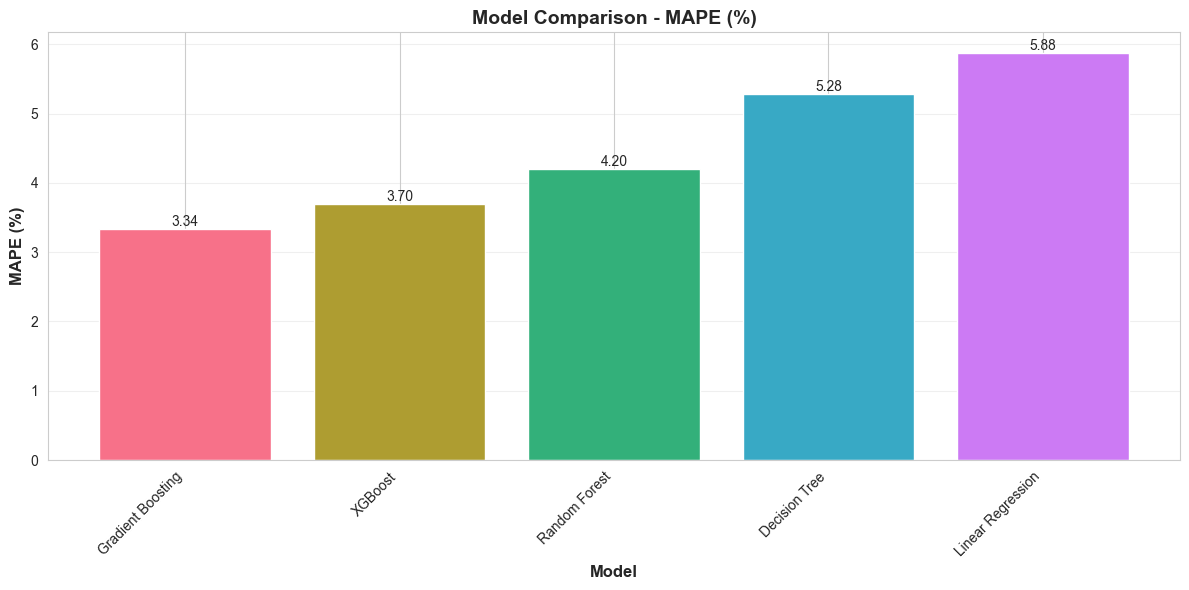

In [14]:
# Plot model comparison for different metrics
metrics = ['R² Score', 'MAE', 'RMSE', 'MAPE (%)']

for metric in metrics:
    evaluator.plot_comparison(metric=metric)

### Detailed Evaluation for Best Models


Detailed Analysis: Random Forest


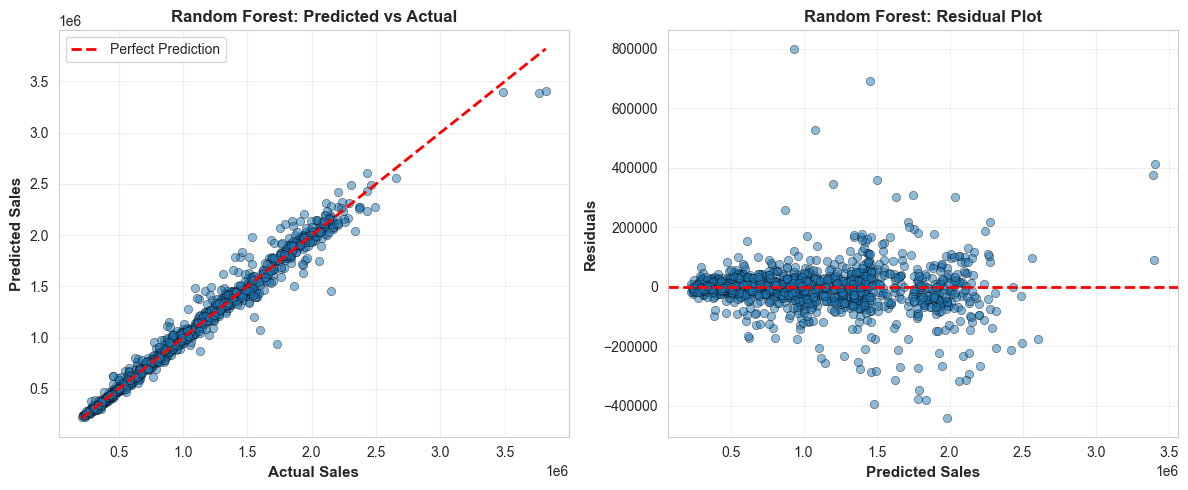

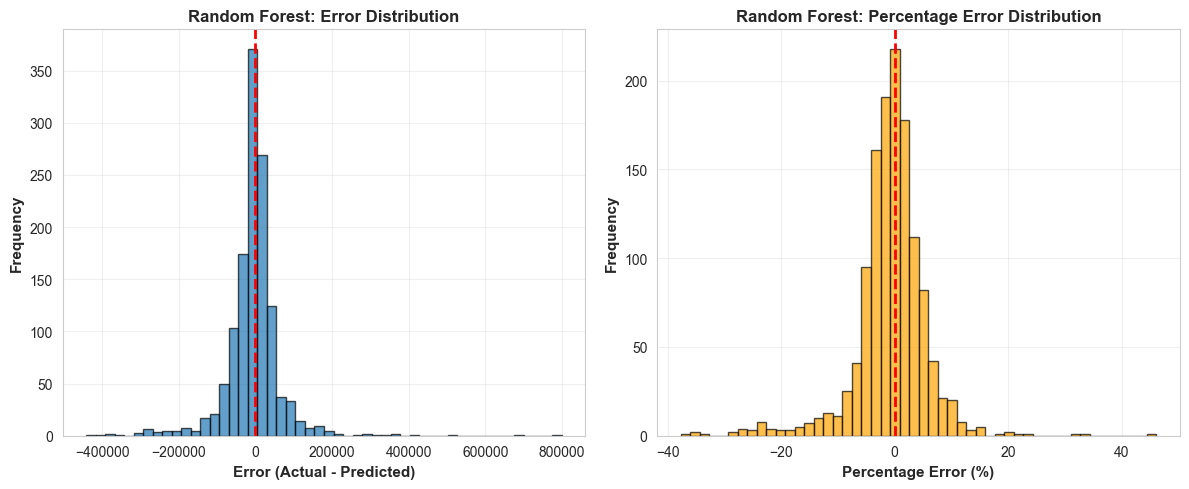


Detailed Analysis: XGBoost


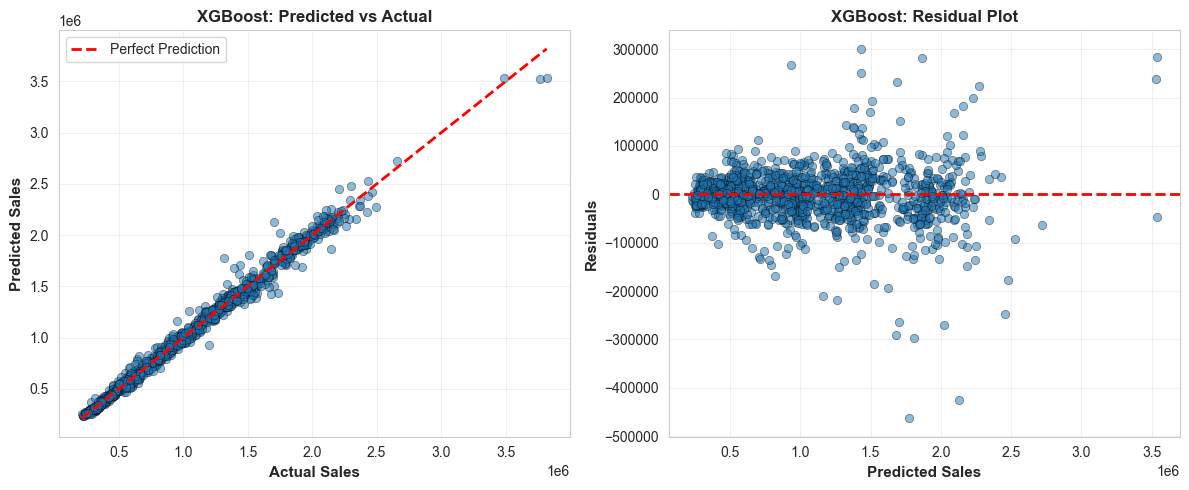

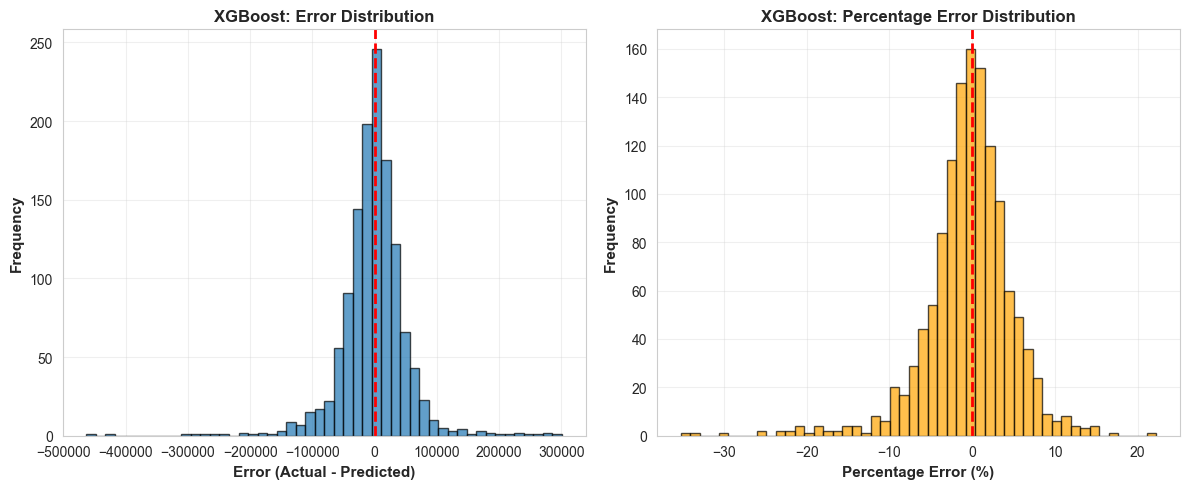


Detailed Analysis: Gradient Boosting


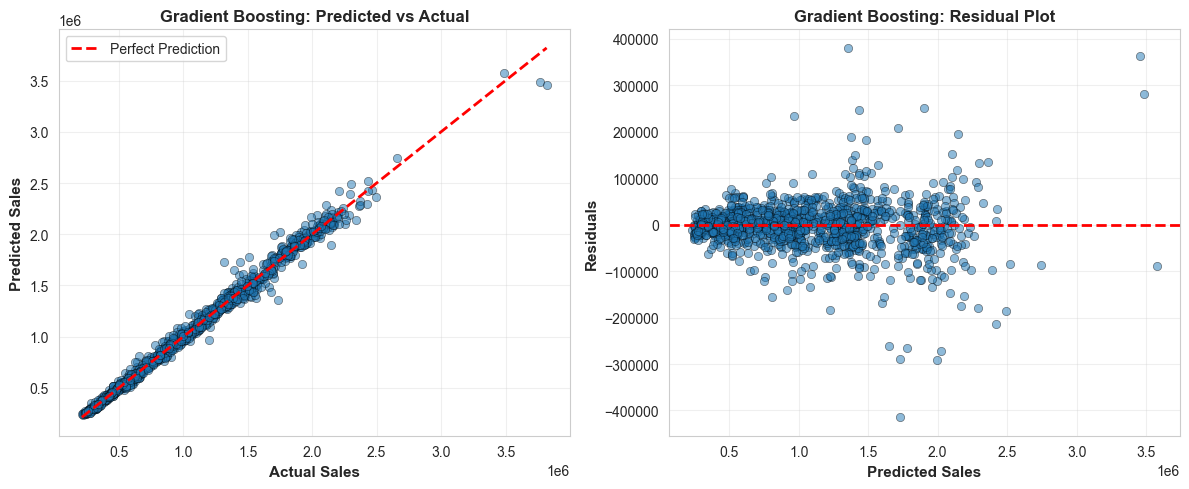

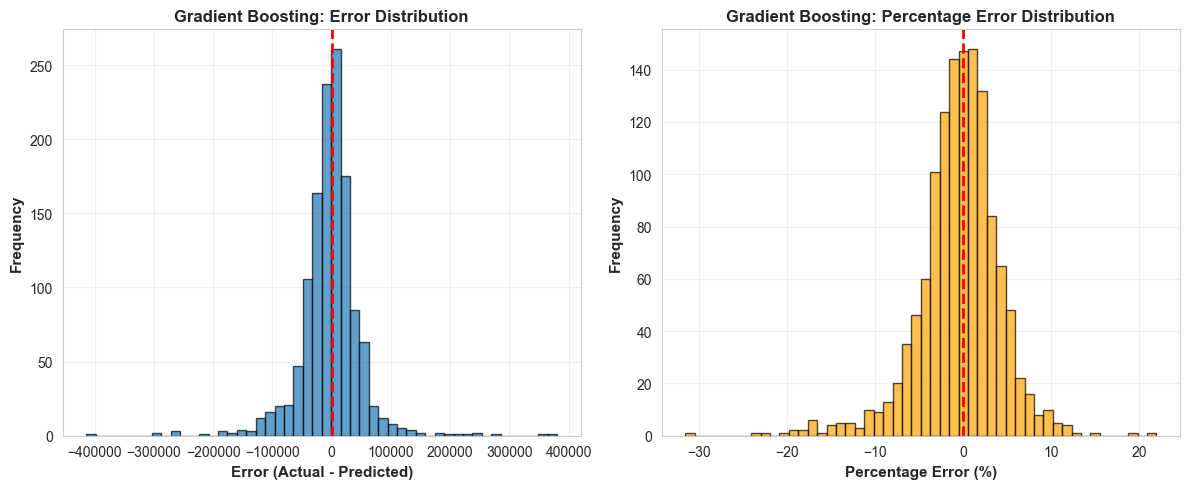

In [15]:
# Select best performing models for detailed analysis
best_models = ['Random Forest', 'XGBoost', 'Gradient Boosting']

for model_name in best_models:
    if model_name in trained_models:
        print(f"\n{'='*70}")
        print(f"Detailed Analysis: {model_name}")
        print(f"{'='*70}")
        
        # Make predictions
        y_pred = trained_models[model_name].predict(X_test_scaled)
        
        # Plot predictions vs actual
        evaluator.plot_predictions_vs_actual(y_test, y_pred, model_name)
        
        # Plot error distribution
        evaluator.plot_error_distribution(y_test, y_pred, model_name)

## 7. Feature Importance Analysis <a id='importance'></a>



Top 15 Features for Random Forest:
            Feature  Importance
Sales_RollingMean_4    0.959027
 Sales_RollingStd_4    0.011191
               Week    0.009060
        Sales_Lag_4    0.006214
                Day    0.004603
        Sales_Lag_1    0.002921
        Sales_Lag_2    0.002099
 Sales_RollingStd_8    0.001290
Sales_RollingMean_8    0.001177
        Temperature    0.000391
                CPI    0.000383
       Holiday_Flag    0.000382
       Unemployment    0.000378
         Fuel_Price    0.000229
              Month    0.000213


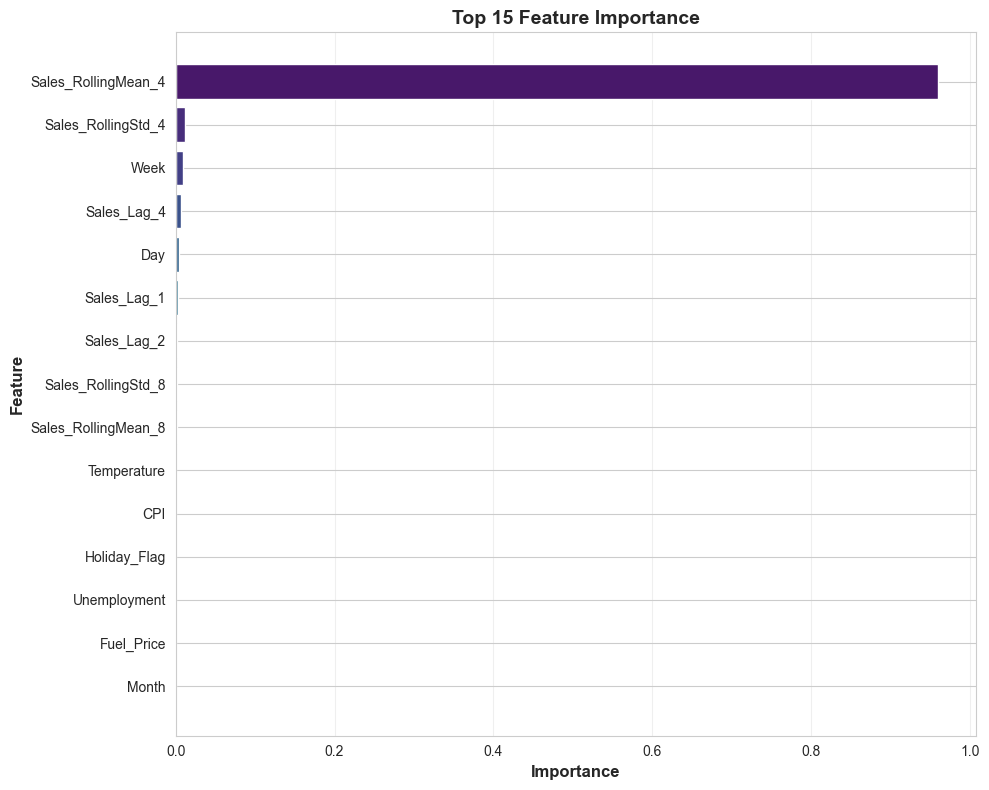



Top 15 Features for XGBoost:
            Feature  Importance
Sales_RollingMean_8    0.409097
Sales_RollingMean_4    0.259992
        Sales_Lag_2    0.135693
        Sales_Lag_1    0.074023
            Quarter    0.038105
        Sales_Lag_4    0.028276
              Month    0.012274
               Week    0.008829
                Day    0.006526
       Holiday_Flag    0.005151
              Store    0.005133
 Sales_RollingStd_8    0.003811
 Sales_RollingStd_4    0.003261
          Month_Sin    0.003050
          Month_Cos    0.002843


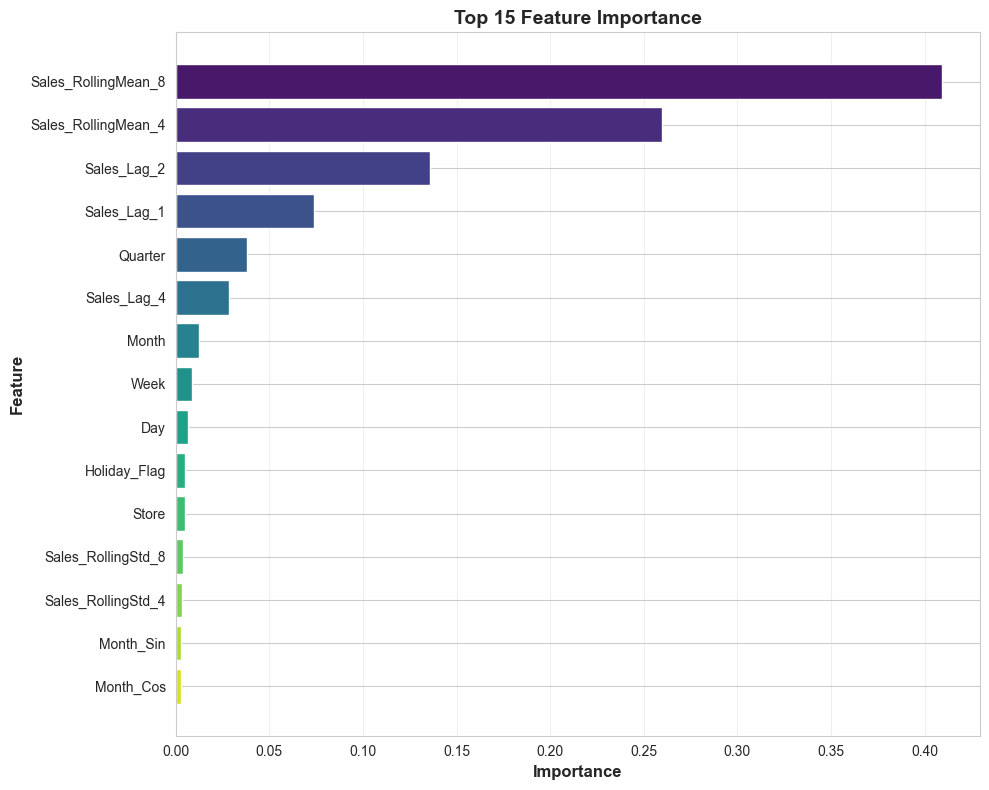



Top 15 Features for Gradient Boosting:
            Feature  Importance
Sales_RollingMean_4    0.952000
               Week    0.017071
 Sales_RollingStd_4    0.009582
                Day    0.008100
        Sales_Lag_4    0.004810
        Sales_Lag_1    0.002010
        Sales_Lag_2    0.001272
          Month_Sin    0.000850
       Holiday_Flag    0.000834
 Sales_RollingStd_8    0.000814
              Month    0.000801
Sales_RollingMean_8    0.000719
       Unemployment    0.000296
          Month_Cos    0.000240
        Temperature    0.000199


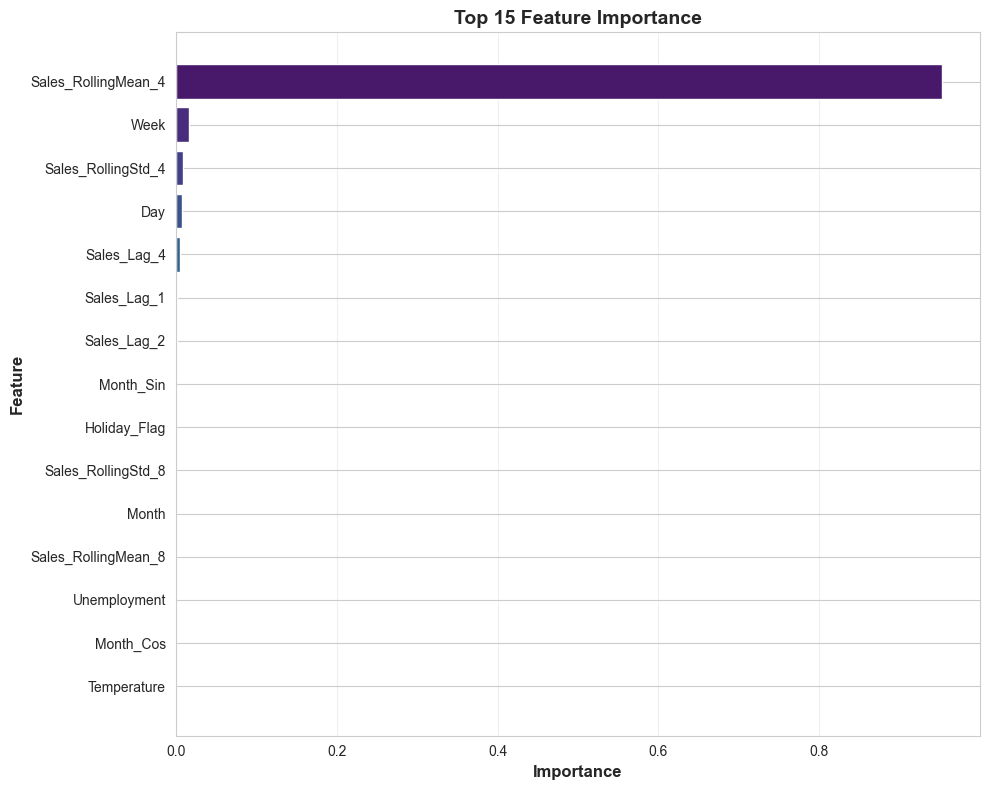



Top 15 Features for Decision Tree:
            Feature  Importance
Sales_RollingMean_4    0.964034
 Sales_RollingStd_4    0.009010
               Week    0.008035
        Sales_Lag_4    0.006091
        Sales_Lag_1    0.004968
        Sales_Lag_2    0.002452
                Day    0.002058
 Sales_RollingStd_8    0.001040
       Holiday_Flag    0.000710
              Month    0.000473
       Unemployment    0.000313
Sales_RollingMean_8    0.000301
        Temperature    0.000109
          Month_Sin    0.000103
                CPI    0.000103


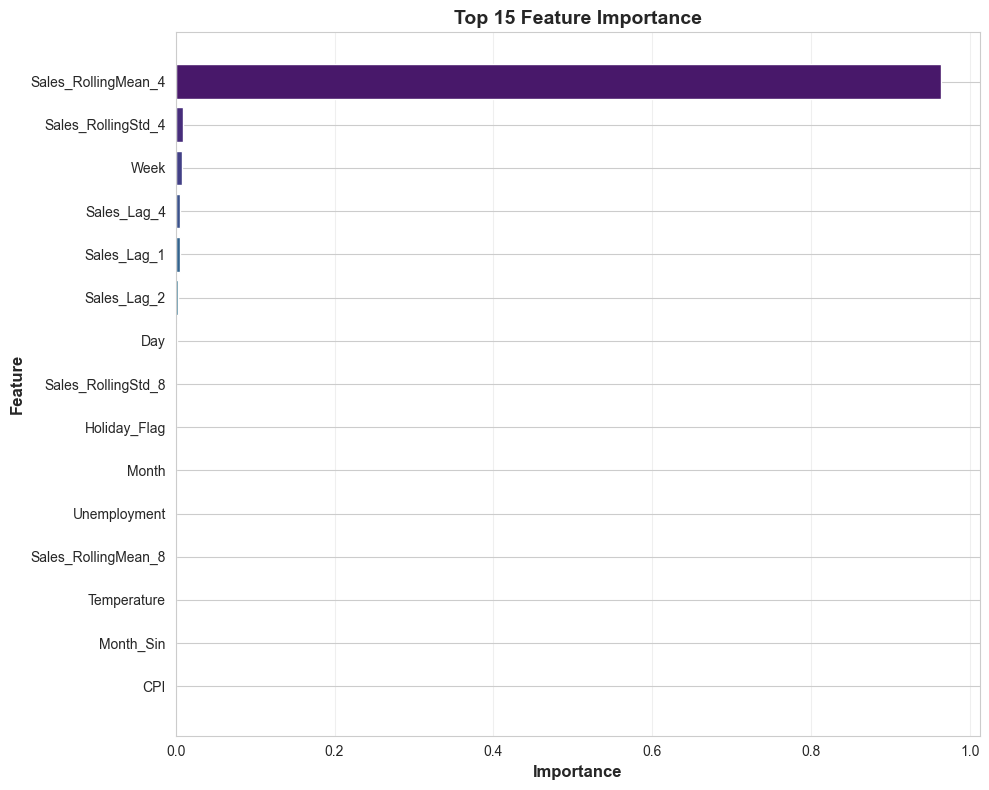

In [16]:
# Get feature names
feature_names = X_train_scaled.columns.tolist()

# Analyze feature importance for tree-based models
tree_models = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Decision Tree']

importance_dfs = {}

for model_name in tree_models:
    if model_name in trained_models:
        print(f"\n{'='*60}")
        importance_df = trainer.get_feature_importance(model_name, feature_names, top_n=15)
        importance_dfs[model_name] = importance_df
        
        # Plot feature importance
        if importance_df is not None:
            evaluator.plot_feature_importance(importance_df, top_n=15)

## 8. Model Comparison <a id='comparison'></a>

In [17]:
# Create comprehensive evaluation report
report = evaluator.create_evaluation_report(save_path='../results/evaluation_report.txt')

WALMART SALES PREDICTION - MODEL EVALUATION REPORT


                           R² Score         MAE           MSE        RMSE  MAPE (%)
Linear Regression (Train)    0.9691  58693.5115  9.804681e+09  99018.5891    5.7544
Linear Regression (Test)     0.9711  59065.7028  9.325582e+09  96569.0545    5.8792
Decision Tree (Train)        0.9862  39332.8484  4.381499e+09  66192.8907    3.7243
Decision Tree (Test)         0.9747  55251.6751  8.143595e+09  90241.8675    5.2764
Random Forest (Train)        0.9926  26259.8105  2.334498e+09  48316.6384    2.4987
Random Forest (Test)         0.9810  44386.0209  6.128790e+09  78286.5883    4.1989
Gradient Boosting (Train)    0.9967  23093.6607  1.053871e+09  32463.3774    2.4575
Gradient Boosting (Test)     0.9915  33126.1830  2.731149e+09  52260.3916    3.3408
XGBoost (Train)              0.9957  26515.6663  1.350123e+09  36744.0153    2.8618
XGBoost (Test)               0.9905  35365.3565  3.059247e+09  55310.4579    3.6957



BEST MODELS PER METR

In [18]:
# Identify the best model
test_results = results_df[results_df.index.str.contains('Test')]
best_model_name = test_results['R² Score'].idxmax().replace(' (Test)', '')
best_r2_score = test_results['R² Score'].max()

print(f"\n{'='*70}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*70}")
print(f"R² Score: {best_r2_score:.4f}")
print(f"MAE: ${test_results.loc[f'{best_model_name} (Test)', 'MAE']:,.2f}")
print(f"RMSE: ${test_results.loc[f'{best_model_name} (Test)', 'RMSE']:,.2f}")
print(f"MAPE: {test_results.loc[f'{best_model_name} (Test)', 'MAPE (%)']:.2f}%")
print(f"{'='*70}")


BEST MODEL: Gradient Boosting
R² Score: 0.9915
MAE: $33,126.18
RMSE: $52,260.39
MAPE: 3.34%


## 9. Save Best Model <a id='save'></a>

In [19]:
# Save all trained models
saved_paths = trainer.save_all_models()

print("\nAll models saved to:")
for model_name, path in saved_paths.items():
    print(f"  - {model_name}: {path}")


Saving all trained models...
Model saved: ../models\linear_regression_model.joblib
Model saved: ../models\decision_tree_model.joblib
Model saved: ../models\random_forest_model.joblib
Model saved: ../models\gradient_boosting_model.joblib
Model saved: ../models\xgboost_model.joblib

All 5 models saved successfully!

All models saved to:
  - Linear Regression: ../models\linear_regression_model.joblib
  - Decision Tree: ../models\decision_tree_model.joblib
  - Random Forest: ../models\random_forest_model.joblib
  - Gradient Boosting: ../models\gradient_boosting_model.joblib
  - XGBoost: ../models\xgboost_model.joblib


In [20]:
# Save the preprocessor scaler for future predictions
import joblib

scaler_path = '../models/scaler.joblib'
joblib.dump(preprocessor.scaler, scaler_path)
print(f"\nScaler saved to: {scaler_path}")


Scaler saved to: ../models/scaler.joblib


In [21]:
# Save feature names for future use
feature_names_path = '../models/feature_names.txt'
with open(feature_names_path, 'w') as f:
    for feature in feature_names:
        f.write(f"{feature}\n")
print(f"Feature names saved to: {feature_names_path}")

Feature names saved to: ../models/feature_names.txt


## Summary and Conclusions

### What we accomplished:

1. **Data Preprocessing**:
   - Loaded and explored the Walmart sales dataset
   - Created time-based features from dates
   - Generated lag and rolling window features
   - Handled missing values appropriately
   - Scaled numerical features

2. **Model Training**:
   - Trained 5 different regression models:
     - Linear Regression (baseline)
     - Decision Tree
     - Random Forest
     - Gradient Boosting
     - XGBoost

3. **Model Evaluation**:
   - Evaluated models using multiple metrics (R², MAE, RMSE, MAPE)
   - Compared model performance
   - Analyzed prediction errors
   - Identified feature importance

4. **Results**:
   - Best performing model identified
   - All models saved for future use
   - Comprehensive evaluation report generated

### Key Findings:

- Tree-based ensemble methods (Random Forest, XGBoost, Gradient Boosting) significantly outperformed linear models
- Lag features and rolling statistics proved to be important predictors
- Store-specific patterns play a crucial role in sales prediction
- The model can effectively predict weekly sales with reasonable accuracy

### Next Steps:

1. Fine-tune hyperparameters of the best model
2. Experiment with additional features
3. Try ensemble methods combining multiple models
4. Deploy the model for production use
5. Set up monitoring for model performance